In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,  LSTM
from keras import metrics
from sklearn.preprocessing import MinMaxScaler

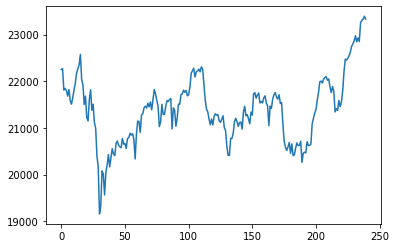

In [3]:
df = pd.read_csv('nikkei.csv', encoding="shift_jis")
L = len(df)
Y = df.iloc[:, 4]  # 終値の列のみ抽出する。
Y = np.array(Y)  # numpy配列に変換する。
Y = Y.reshape(-1, 1)  # 行列に変換する。（配列の要素数行×1列）

import matplotlib.pyplot as plt
plt.plot(Y)

In [4]:
df.head()

,日付,始値,高値,安値,終値
0,2018/11/9,22471.31,22494.58,22226.01,22250.25
1,2018/11/12,22121.70,22324.01,22046.29,22269.88
2,2018/11/13,21885.24,21892.29,21484.65,21810.52
3,2018/11/14,21851.13,21990.41,21764.88,21846.48
4,2018/11/15,21670.35,21818.73,21613.53,21803.62


In [5]:
X1 = Y[0:L-3, :]  # 予測対象日の3日前のデータ
X2 = Y[1:L-2, :]  # 予測対象日の2日前のデータ
X3 = Y[2:L-1, :]  # 予測対象日の前日データ
Y = Y[3:L, :]  # 予測対象日のデータ
X = np.concatenate([X1, X2, X3], axis=1)  # numpy配列を結合する。

In [6]:
scaler = MinMaxScaler()  # データを0～1の範囲にスケールするための関数。
scaler.fit(X)  # スケーリングに使用する最小／最大値を計算する。
X = scaler.transform(X)  # Xをを0～1の範囲にスケーリングする。
scaler1 = MinMaxScaler()  # データを0～1の範囲にスケールするための関数。
scaler1.fit(Y)  # スケーリングに使用する最小／最大値を計算する。
Y = scaler1.transform(Y)  # Yをを0～1の範囲にスケーリングする。

In [7]:
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))  # 3次元配列に変換する。
# train, testデータを定義
X_train = X[:190, :, :]
X_test = X[190:, :, :]
Y_train = Y[:190, :]
Y_test = Y[190:, :]

In [14]:
model = Sequential()
model.add(LSTM(10, activation = 'tanh', input_shape = (1,3), recurrent_activation= 'hard_sigmoid'))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error', optimizer = 'rmsprop', metrics=[metrics.mae])
model.fit(X_train, Y_train, epochs=100, verbose=2)

Epoch 1/100
6/6 - 3s - loss: 145167048804824525045760.0000 - mean_absolute_error: 380859056128.0000
Epoch 2/100
6/6 - 0s - loss: 145167066819223034527744.0000 - mean_absolute_error: 380859056128.0000
Epoch 3/100
6/6 - 0s - loss: 145167066819223034527744.0000 - mean_absolute_error: 380859056128.0000
Epoch 4/100
6/6 - 0s - loss: 145167066819223034527744.0000 - mean_absolute_error: 380859056128.0000
Epoch 5/100
6/6 - 0s - loss: 145167048804824525045760.0000 - mean_absolute_error: 380859056128.0000
Epoch 6/100
6/6 - 0s - loss: 145167066819223034527744.0000 - mean_absolute_error: 380859056128.0000
Epoch 7/100
6/6 - 0s - loss: 145167048804824525045760.0000 - mean_absolute_error: 380859056128.0000
Epoch 8/100
6/6 - 0s - loss: 145167048804824525045760.0000 - mean_absolute_error: 380859056128.0000
Epoch 9/100
6/6 - 0s - loss: 145167048804824525045760.0000 - mean_absolute_error: 380859056128.0000
Epoch 10/100
6/6 - 0s - loss: 145167066819223034527744.0000 - mean_absolute_error: 380859056128.0000

Epoch 83/100
6/6 - 0s - loss: 145167066819223034527744.0000 - mean_absolute_error: 380859056128.0000
Epoch 84/100
6/6 - 0s - loss: 145167048804824525045760.0000 - mean_absolute_error: 380859056128.0000
Epoch 85/100
6/6 - 0s - loss: 145167066819223034527744.0000 - mean_absolute_error: 380859056128.0000
Epoch 86/100
6/6 - 0s - loss: 145167048804824525045760.0000 - mean_absolute_error: 380859056128.0000
Epoch 87/100
6/6 - 0s - loss: 145167066819223034527744.0000 - mean_absolute_error: 380859056128.0000
Epoch 88/100
6/6 - 0s - loss: 145167066819223034527744.0000 - mean_absolute_error: 380859088896.0000
Epoch 89/100
6/6 - 0s - loss: 145167048804824525045760.0000 - mean_absolute_error: 380859056128.0000
Epoch 90/100
6/6 - 0s - loss: 145167066819223034527744.0000 - mean_absolute_error: 380859056128.0000
Epoch 91/100
6/6 - 0s - loss: 145167066819223034527744.0000 - mean_absolute_error: 380859056128.0000
Epoch 92/100
6/6 - 0s - loss: 145167066819223034527744.0000 - mean_absolute_error: 38085905

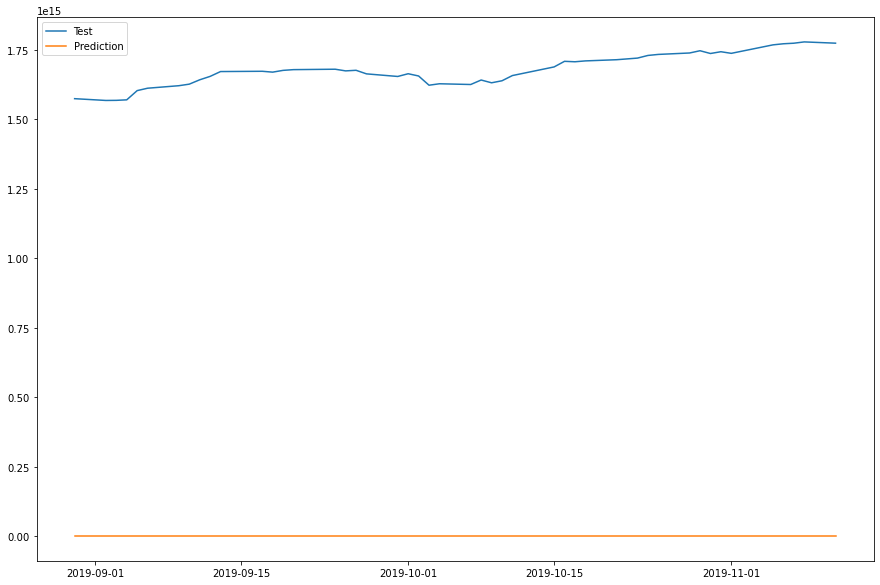

In [15]:
Predict = model.predict(X_test)

# オリジナルのスケールに戻す、タイムインデックスを付ける。
Y_train = scaler1.inverse_transform(Y_train)
Y_train = pd.DataFrame(Y_train)
Y_train.index = pd.to_datetime(df.iloc[3:193,0])
Y_test = scaler1.inverse_transform(Y_test)
Y_test = pd.DataFrame(Y_test)
Y_test.index = pd.to_datetime(df.iloc[193:,0])
Predict = scaler1.inverse_transform(Predict)
Predict = pd.DataFrame(Predict)
Predict.index=pd.to_datetime(df.iloc[193:,0])
plt.figure(figsize=(15,10))
plt.plot(Y_test, label = 'Test')
plt.plot(Predict, label = 'Prediction')
plt.legend(loc='best')
plt.show()